# Importing the libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Heading

## 
###
####

In [2]:
#pip install keras==2.7.0

In [3]:
#pip install tensorflow==2.7.0
#pip install pydot

In [4]:
#conda install python=3.7.6

In [5]:
orig=mnist

In [6]:
#pip install pydot

# Importing the Datasets

In [7]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [8]:
 y_test_digit[3]

0

# Visualize the Input Images

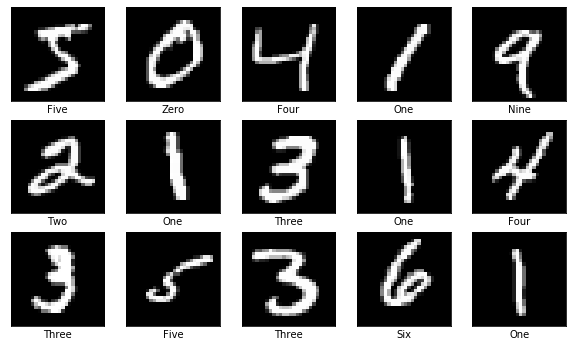

In [9]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

# Checking the images, rows and columns of training set

In [10]:
X_train_digit.shape

(60000, 28, 28)

# Converting the training set 3d into 2d

In [11]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

# See the test output images values

In [12]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Converting the test set 3d into 2d

In [13]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

# Used One hot encoding

In [14]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
#pip install scikit-learn==0.24.2

# Creating brain just like formula

In [16]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

# Creating model

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [18]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

# Giving the playable parameters

In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

# Substituting and giving playable parameters

In [20]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 1.4040 - accuracy: 0.8474 - val_loss: 0.3261 - val_accuracy: 0.9208
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2527 - accuracy: 0.9326 - val_loss: 0.2531 - val_accuracy: 0.9352
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1644 - accuracy: 0.9526 - val_loss: 0.2256 - val_accuracy: 0.9443
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1345 - accuracy: 0.9609 - val_loss: 0.2211 - val_accuracy: 0.9417
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1152 - accuracy: 0.9670 - val_loss: 0.1857 - val_accuracy: 0.9510
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9699 - val_loss: 0.1637 - val_accuracy: 0.9600
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0962 - accuracy: 0.9720 - val_loss: 0.1684 - val_accuracy: 0.9607
Epoch 

# Checking the training set loss and accuracy

In [21]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9640


# Just checking the accuracy with particular  values

In [22]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.964


# Prediciting the model

In [23]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


# Checking the values

In [24]:
y_predict[0]

array([9.9999577e-01, 2.9902708e-07, 9.9994493e-01, 9.9998891e-01,
       9.9362731e-01, 1.0000000e+00, 4.4346362e-02, 1.0000000e+00,
       2.2360295e-02, 9.9997723e-01], dtype=float32)

# we want exact values of one hot encoding

In [25]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

# 

In [26]:
y_predicts[0]

5

# 

In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Assign R.H.S value to the variable

In [28]:
y_pre=pd.DataFrame(y_predicts)

# See the y-pre outputs

In [29]:
y_pre

,0
0,5
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,1
9998,0


# 

In [30]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Visuaizing the True or False prediction

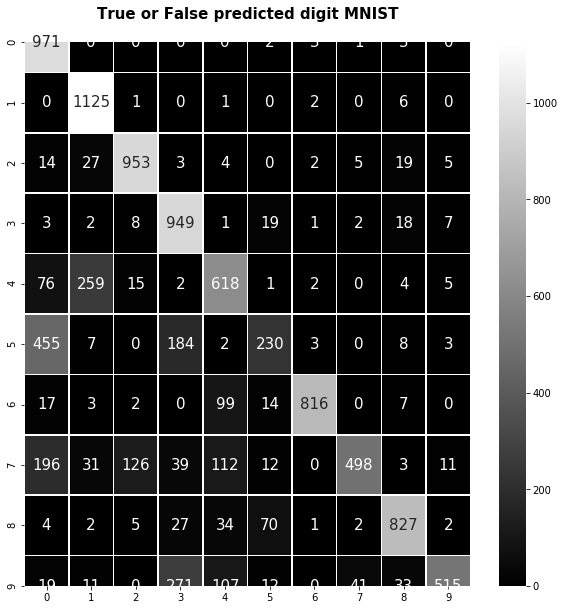

In [31]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

# Checking the model perfomance using confusion matrix

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       980
           1       0.77      0.99      0.86      1135
           2       0.86      0.92      0.89      1032
           3       0.64      0.94      0.76      1010
           4       0.63      0.63      0.63       982
           5       0.64      0.26      0.37       892
           6       0.98      0.85      0.91       958
           7       0.91      0.48      0.63      1028
           8       0.89      0.85      0.87       974
           9       0.94      0.51      0.66      1009

    accuracy                           0.75     10000
   macro avg       0.78      0.74      0.73     10000
weighted avg       0.78      0.75      0.74     10000



# Test set and training set performance

In [33]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Seeing the model accuracy using graph

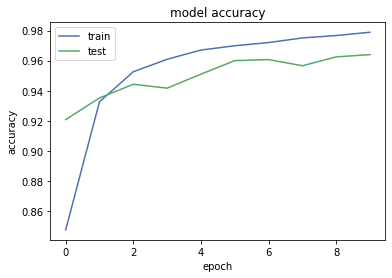

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


# Seeing the model loss using graph

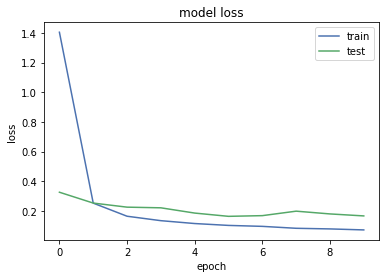

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# 

In [36]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

# 

In [37]:
y_predicts_single[0]

1

# Model deployment

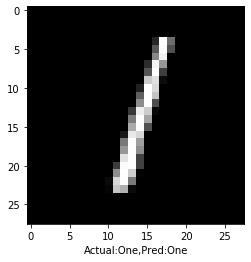

In [38]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

# 

In [39]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)